In [2]:
# Import required libraries
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

In [3]:
# Read in the CSV file as a pandas DataFrame
df = pd.read_csv("Resources/model_car_prices.csv")

# Review the DataFrame
df.head()


,odometer,mmr,year,make,body,color,interior,sellingprice,automatic
0,-0.978595,0.726397,2015,24,6,17,1,21500.0,True
1,-1.117537,0.758191,2015,24,6,17,0,21500.0,True
2,-1.272126,1.934580,2014,3,7,8,1,30000.0,True
3,-1.023790,1.468264,2015,52,7,17,1,27750.0,True
4,-1.247006,5.548533,2014,3,7,8,1,67000.0,True


<Axes: title={'center': 'selling price by year'}, xlabel='year', ylabel='sellingprice'>

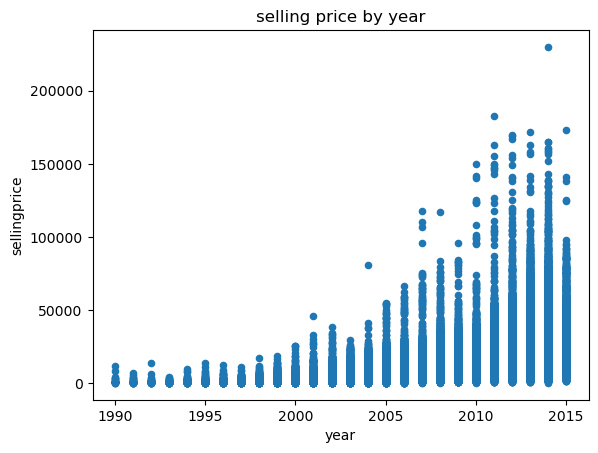

In [4]:
# Create a scatter plot with the sellingprice by year
sellingprice_plot = df.plot.scatter(
    x="year",
    y="sellingprice",
    title="selling price by year"
)
sellingprice_plot

In [5]:
# Create the X set
X = df["year"].values.reshape(-1, 1)

# Display sample data
X[:5]

array([[2015],
       [2015],
       [2014],
       [2015],
       [2014]], dtype=int64)

In [6]:
# Create an array for the dependent variable y with the sellingprice data
y = df["sellingprice"]

## Build the Linear Regression Model

In [7]:
# Create a model with scikit-learn
model = LinearRegression()

In [8]:
# Fit the data into the model
model.fit(X, y)

LinearRegression()

In [9]:
# Display the slope
print(f"Model's slope: {model.coef_}")

Model's slope: [1440.69178436]


In [10]:
# Display the y-intercept
print(f"Model's y-intercept: {model.intercept_}")

Model's y-intercept: -2882485.687034686


In [11]:
# Display the model's best fit line formula
print(f"Model's formula: y = {model.intercept_} + {model.coef_[0]}X")

Model's formula: y = -2882485.687034686 + 1440.6917843611943X


In [12]:
# Make predictions using the X set
predicted_y_values = model.predict(X)

In [15]:
# Create a copy of the original data
df_sellingprice_predicted = df.copy()

# Add a column with the sellingprice values
df_sellingprice_predicted["sellingprice_predicted"] = predicted_y_values

# Display sample data
df_sellingprice_predicted.head()

,odometer,mmr,year,make,body,color,interior,sellingprice,automatic,sellingprice_predicted
0,-0.978595,0.726397,2015,24,6,17,1,21500.0,True,20508.258453
1,-1.117537,0.758191,2015,24,6,17,0,21500.0,True,20508.258453
2,-1.272126,1.934580,2014,3,7,8,1,30000.0,True,19067.566669
3,-1.023790,1.468264,2015,52,7,17,1,27750.0,True,20508.258453
4,-1.247006,5.548533,2014,3,7,8,1,67000.0,True,19067.566669


<Axes: xlabel='year'>

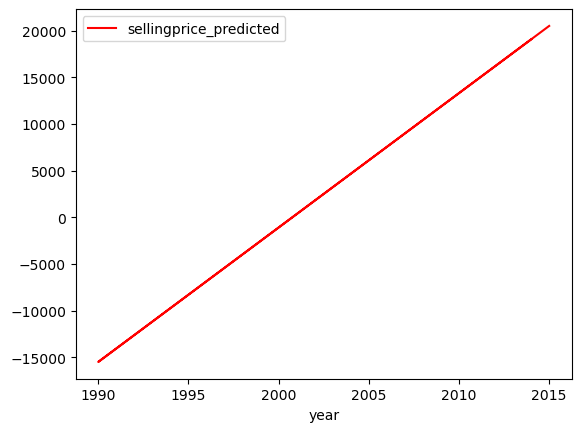

In [16]:
# Create a line plot of the predicted sellingprice values
best_fit_line = df_electricity_predicted.plot.line(
    x = "year",
    y = "sellingprice_predicted",
    color = "red"
)
best_fit_line

<Axes: title={'center': 'Sellingprice by Year'}, xlabel='year', ylabel='sellingprice'>

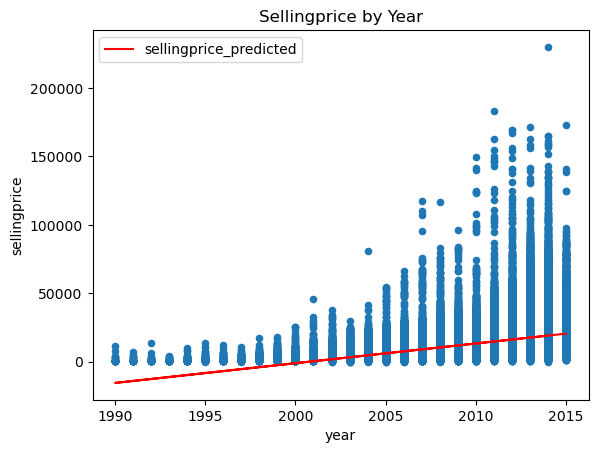

In [20]:
# Superpose the original data and the best fit line
# Create a scatter plot with the sellingprice information
sellingprice_plot = df_sellingprice_predicted.plot.scatter(
    x="year",
    y="sellingprice",
    title="Sellingprice by Year"
)

# Create a line plot of the predicted total electricity generation values
best_fit_line = df_sellingprice_predicted.plot.line(
    x = "year",
    y = "sellingprice_predicted",
    color = "red",
    ax=sellingprice_plot
)
sellingprice_plot

In [37]:
# Display the formula to predict the electricity generation for 2023
print(f"Model's formula: y = {model.intercept_} + {model.coef_[0]} * 2005")

# Predict the electricity generation for 2023
y_2005 = model.intercept_ + model.coef_[0] * 2023

# Display the prediction
print(f"Predicted electricity generation for 2023: {y_2005:.2f}")

Model's formula: y = -2882485.687034686 + 1440.6917843611943 * 2005
Predicted electricity generation for 2023: 32033.79


In [22]:
# Import relevant metrics - score, r2, mse, rmse - from Scikit-learn
from sklearn.metrics import mean_squared_error, r2_score

In [23]:
# Compute the metrics for the linear regression model
score = round(model.score(X, y, sample_weight=None),5)
r2 = round(r2_score(y, predicted_y_values),5)
mse = round(mean_squared_error(y, predicted_y_values),4)
rmse = round(np.sqrt(mse),4)

# Print relevant metrics.
print(f"The score is {score}.")
print(f"The r2 is {r2}.")
print(f"The mean squared error is {mse}.")
print(f"The root mean squared error is {rmse}.")

The score is 0.33708.
The r2 is 0.33708.
The mean squared error is 60016235.3594.
The root mean squared error is 7747.0146.
